# Individual Planning Stage

### Import libraries

In [2]:
library(tidyverse)
library(tidymodels)

set.seed(10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Data Description

The data is collected within an AI project at UBC were the purpose is to investigate how people play videogames. Data about the players and their playing sessions is collected through the server, with the player's consent. 

### Reading data

In [3]:
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


### Data description - Players dataset

The players dataset contains 196 observations, and  contains missing values. 

##### Variable description

There are 7 variables in the players dataset and they are the following:

| Variable name    | Type | Description |
| -------- | ------- | ------- |
| experience  | Character    | The player's experience level (Amateur/ Beginner/ Regular/ Veteran/ Pro)  |
| subscribe | Logical     | Does the player have a subscribe to a game-related newspaper (TRUE/ FALSE) |
| hashedEmail    | Character    | Unique hash-code representing the player's email |
| played_hours    | Double    | Total number of hours played |
| name    | Character    | Player's name |
| gender    | Character    | Player's gender (Female/ Male) |
| Age    | Double    | Player's age |


##### Summary statistics

To better understand the data, minimun and maximum values as well as mean values and standard deviation is calculated for the quantitative variables.

In [10]:
summary <- summarize(players, 
         min_played_hours = round(min(played_hours, na.rm = TRUE), 2),
         max_played_hours = round(max(played_hours, na.rm = TRUE), 2),
         mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
         sd_played_hours = round(sd(played_hours, na.rm = TRUE), 2),
         min_age = round(min(Age, na.rm = TRUE), 2),
         max_age = round(max(Age, na.rm = TRUE), 2),
         mean_age = round(mean(Age, na.rm = TRUE), 2),
         sd_age = round(sd(Age, na.rm = TRUE), 2))

summary_table <- tibble(
  variable = c("played_hours", "Age"),
  min  = c(summary$min_played_hours, summary$min_age),
  max  = c(summary$max_played_hours, summary$max_age),
  mean = c(summary$mean_played_hours, summary$mean_age),
  std   = c(summary$sd_played_hours, summary$sd_age)
)

summary_table

variable,min,max,mean,std
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
played_hours,0,223.1,5.85,28.36
Age,9,58.0,21.14,7.39


### Data description - Sessions dataset

##### Variable description

The sessions dataset has 1535 observations and 5 variables. The variables are the following:

| Variable name    | Type | Description |
| -------- | ------- | ------- |
| hashedEmail    | Character    | Unique hash-code representing the player's email |
| start_time    | Character    | Session's start time, expressed as dd/mm/yyyy hh:mm |
| end_time    | Character    | Session's end time, expressed as dd/mm/yyyy hh:mm |
| original_start_time    | Double  | Absolute start time (milliseconds) |
| original_end_time    | Double    | Absolute end time (milliseconds) |

##### Summary statistics

In [12]:
session_summary <- summarize(sessions, 
         min_session_time = round(min(original_end_time - original_start_time, na.rm = TRUE), 2),
         max_session_time = round(max(original_end_time - original_start_time, na.rm = TRUE), 2),
         mean_session_time = round(mean(original_end_time - original_start_time, na.rm = TRUE), 2),
         sd_session_time = round(sd(original_end_time - original_start_time, na.rm = TRUE), 2))

session_summary_table <- tibble(
  variable = c("Session time (ms)"),
  min  = c(session_summary$min_session_time),
  max  = c(session_summary$max_session_time),
  mean = c(session_summary$mean_session_time),
  std   = c(session_summary$sd_session_time)
)

session_summary_table

variable,min,max,mean,std
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Session time (ms),0,2e+07,2909328,4781410


### Potential issues

There are a few potential issues with the data in its current form

- The sessions dataset needs to be cleaned to be able to seperate the date and the time in the variables start\_time and end\_time
- In the sessions dataset, the original_start_time and original_end_time seems to have the same value for many observations.
- The player's dataset contains missing values
- There seems to be some outliers in the hours_played variable whih may influence the linear regression

## Questions

### Broad Question

The broad problem statement I want to help the researchers adress is:

*We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.*

### Specific Research Questions

The specific research question I will investigate is:

*Can player characteristics such as player's age and experience level predict the numbers of hours played?*

To do so, I will use the data use the data from the variables experience and Age from the player's dataset as predictor variables and the variable played_hours as a numerical response variable. I will use linear regression for the prediction.

## Exploratory Data Analysis and Visualization

#### Tidying data

In [13]:
sessions <- sessions |>
  separate(start_time, into = c("start_date", "start_time"), sep = " ") |>
  separate(end_time,   into = c("end_date", "end_time"), sep = " ")

head(sessions)

hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,23/06/2024,17:10,1.71916e+12,1.71916e+12


#### Visualizations

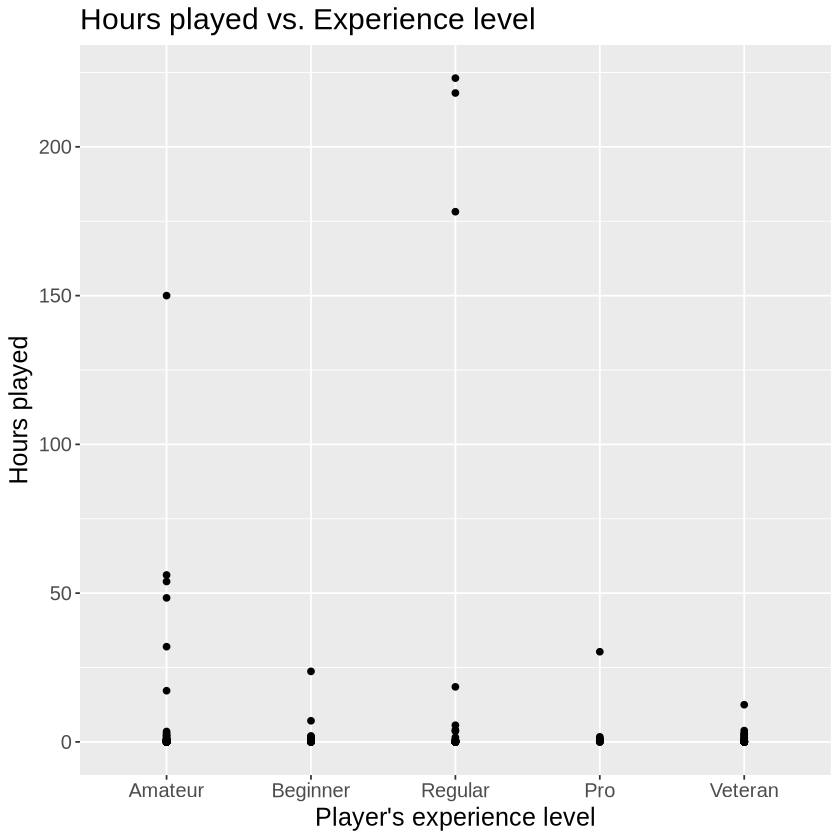

In [5]:
players <- players |>
    mutate(experience = factor(experience,
                            levels = c("Amateur", "Beginner", "Regular", "Pro", "Veteran")))

experience_plot <- ggplot(players, aes(x = experience, y = played_hours)) +
    geom_point() +
    labs(x = "Player's experience level", y = "Hours played") +
    ggtitle("Hours played vs. Experience level") +
    theme(text = element_text(size = 15))

experience_plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


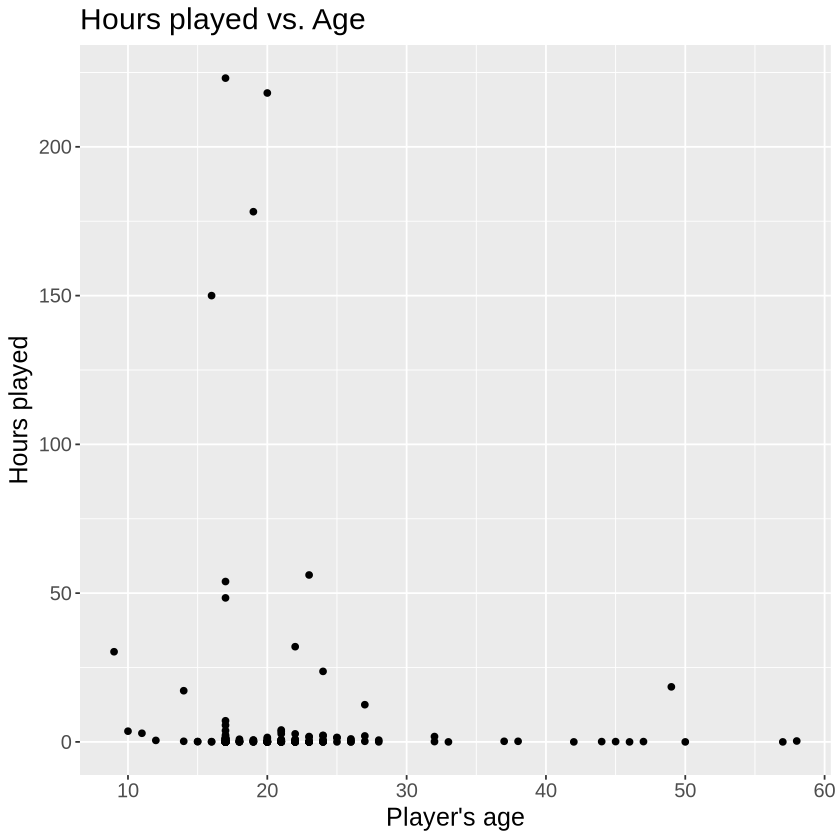

In [4]:
age_plot <- ggplot(players, aes(x = Age, y = played_hours)) +
    geom_point() +
    labs(x = "Player's age", y = "Hours played") +
    ggtitle("Hours played vs. Age") +
    theme(text = element_text(size = 15))

age_plot

## Methods and Plan

#### Method description

To do the prediction, linear regression will be used. Three different combinations of predictor variables will be used and those are

1. experience
2. Age
3. experience and Age

First, the data will be processed. The experience level variable will be coded to numbers based on my assumption of the order of levels. The levels will be coded as followed:

- Amateur to 1
- Beginner to 2
- Regular to 3
- Pro to 4
- Veteran to 5

The data won't be standardizied since it isn't required for linear regression and standardizaion results in lower interpretability. The data set used for prediction will consist of the two explanatory variables as well as the response variable, hours_played. The dataset will be split into a training dataset (70 \%), a validation set (15 \%) and a testing dataset (15 \%). 

To validate the model performance with the different combinations of predictors during training, the validation set will be used. The best combination will be chosen based on the lowest RMSE.

#### Limitations and weaknesses

- Linear regression bases the predictions on linear relationship between the explanatory variables and the response variable which isn't clear from the visualizations.
- The testing and validation datasets become small when using a validation set, but that is needed in this case.
- Since the model is chosen based on a small validation set, the selection might be dependent on the random split.